# STEP 0: INI FILE CONFIGRATION

In [ ]:
!pip install colab-env -qU
import colab_env

In [ ]:
from colab_env import envvar_handler

In [ ]:
envvar_handler.add_env("ini","/content/gdrive/MyDrive/customerchurnpredictionxg.ini")

In [ ]:
import os
ini_path=os.environ['ini']

In [ ]:
import configparser

import os

vAR_Config = configparser.ConfigParser(allow_no_value=True)

vAR_INI_FILE_PATH = ini_path

vAR_INI_FILE_PATH

vAR_Config.read(vAR_INI_FILE_PATH)

vAR_Data = vAR_Config.sections()

vAR_Config.sections()

vAR_Train_Data = vAR_Config['FILE PATH']['TRAINING_DATA']

vAR_Training_Data_Excel_Worsheet = vAR_Config['FILE PATH']['TRAINING_DATA_EXCEL_WORKSHEET']
print(vAR_Training_Data_Excel_Worsheet)

vAR_Test_Data = vAR_Config['FILE PATH']['TEST_DATA']
print(vAR_Test_Data)

vAR_Test_Data_Excel_Worsheet = vAR_Config['FILE PATH']['TEST_DATA_EXCEL_WORKSHEET']
print(vAR_Test_Data_Excel_Worsheet)

vAR_Model_Outcome_LG = vAR_Config['FILE PATH']['MODEL_OUTCOME1']
print(vAR_Model_Outcome_LG)
vAR_Model_Outcome_XG = vAR_Config['FILE PATH']['MODEL_OUTCOME2']
print(vAR_Model_Outcome_XG)

CUSTOMER_CHURN_TRAINING_DATA
/content/gdrive/MyDrive/CUSTOMER_CHURN_TEST_DATA.xlsx
CUSTOMER_CHURN_TEST_DATA
/content/gdrive/MyDrive/CUSTOMER_CHURN_PREDICTION_RESULTSLG.xlsx
/content/gdrive/MyDrive/CUSTOMER_CHURN_PREDICTION_RESULTSXG.xlsx


# STEP 1: IMPORT THE LIBRARIES

In [ ]:
import pandas as vAR_pd

import xgboost as vAR_xgb 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

# STEP 2: IMPORT THE TRAINING DATA

In [ ]:
vAR_TRAINING_DATA = vAR_pd.read_excel(vAR_Train_Data)

vAR_TRAINING_DATA.head()

vAR_df = vAR_TRAINING_DATA 


In [ ]:
vAR_df.shape

(2104, 8)

# STEP 3: FEATURE SELECTION(MANUAL)

In [ ]:
vAR_Features_Train = vAR_df[['Quantity(in lots)','Price Amount','Service Call','Service Failure Rate%pa','Customer Lifetime(Days)']]

vAR_Features_Train.head()

,Quantity(in lots),Price Amount,Service Call,Service Failure Rate%pa,Customer Lifetime(Days)
0,97,1328.664032,40,50,2319
1,53,1714.146002,28,89,2179
2,47,861.628336,44,25,2487
3,95,1249.003693,39,1,2321
4,41,1856.952776,92,30,2463


# DEFINING THE LABELS

In [ ]:
vAR_label_train = vAR_df.iloc[:,7]

# STEP 4: IMPORT THE MODEL

In [ ]:
vAR_Model1 = LogisticRegression()

vAR_Model2 = XGBClassifier()

# TRAIN THE MODEL

In [ ]:
vAR_Model1.fit(vAR_Features_Train,vAR_label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
vAR_Model2.fit(vAR_Features_Train,vAR_label_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
vAR_Score = vAR_Model1.score(vAR_Features_Train, vAR_label_train)

print(vAR_Score)

0.5636882129277566


In [ ]:
vAR_Score = vAR_Model2.score(vAR_Features_Train, vAR_label_train)

print(vAR_Score)

0.7081749049429658


# HYPERPARAMETER TUNNING

In [ ]:
vAR_Model2 = XGBClassifier(eta=0.01,gamma=10)

In [ ]:
vAR_Model2.fit(vAR_Features_Train,vAR_label_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=10,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
vAR_Score = vAR_Model2.score(vAR_Features_Train, vAR_label_train)

print(vAR_Score)

0.5636882129277566


# IMPORT THE TEST DATA

In [ ]:
vAR_TEST_DATA = vAR_pd.read_excel(vAR_Test_Data)

vAR_TEST_DATA.head()

vAR_df1 = vAR_TEST_DATA 


In [ ]:
vAR_Features_Test = vAR_df1[['Quantity(in lots)','Price Amount','Service Call','Service Failure Rate%pa','Customer Lifetime(Days)']]

# USING LOGISTIC REGRESSION

In [ ]:
vAR_Labels_pred1 = vAR_Model1.predict(vAR_Features_Test)

In [ ]:
vAR_Labels_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vAR_Labels_pred1 = vAR_pd.DataFrame(vAR_Labels_pred1,columns={'Predicted_Customer_Churn'})

In [ ]:
vAR_df2 = vAR_df1.merge(vAR_Labels_pred1,left_index=True,right_index=True)

In [ ]:
vAR_df3 = vAR_df2.to_excel(vAR_Model_Outcome_LG)

# ACCURACY TEST ON LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(vAR_label_train,vAR_Labels_pred1)

0.5636882129277566

# USING XGBOOST

In [ ]:
vAR_Labels_predXG = vAR_Model2.predict(vAR_Features_Test)

In [ ]:
vAR_Labels_predXG

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
vAR_Labels_predXG = vAR_pd.DataFrame(vAR_Labels_predXG,columns={'Predicted_Customer_ChurnXG'})

In [ ]:
vAR_df6 = vAR_df1.merge(vAR_Labels_predXG,left_index=True,right_index=True)

In [ ]:
vAR_df7 = vAR_df6.to_excel(vAR_Model_Outcome_XG)

# ACCURACY TEST ON XGBOOST

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(vAR_label_train,vAR_Labels_predXG)

0.5636882129277566

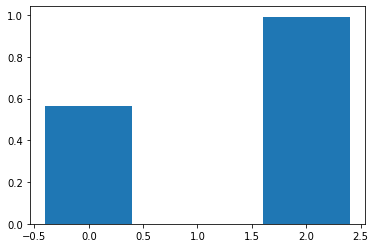

In [ ]:
import matplotlib.pyplot as plt
Logistic = 0.563688212927756
XGBoost=0.9928707224334601

plt.bar([0 ,2], [Logistic, XGBoost])
plt.show()

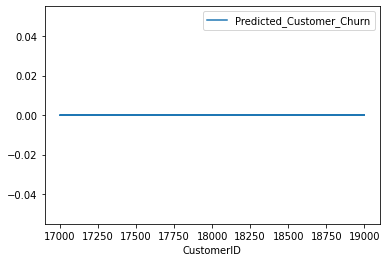

In [ ]:
vAR_df2.plot(x="CustomerID", y="Predicted_Customer_Churn")

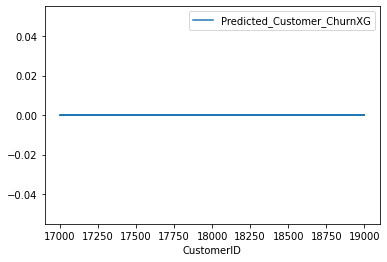

In [ ]:
vAR_df6.plot(x="CustomerID", y="Predicted_Customer_ChurnXG")